<a href="https://colab.research.google.com/github/Amaranth32/YOLOFinal/blob/main/ground10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
path = kagglehub.dataset_download("swish9/weeds-detection")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weeds-detection' dataset.
Path to dataset files: /kaggle/input/weeds-detection


In [2]:
!pip install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# creating yaml file to make new model
# this is an attempt at creating my own model

import yaml

trainPath = '/kaggle/input/weeds-detection/dataset/images/train'
validPath = '/kaggle/input/weeds-detection/dataset/images/val'
testPath = '/kaggle/input/weeds-detection/dataset/images/test'
Id = ['crop','weed'] #classes
numIds = 2 #number of classes
bs = -1

# modeled after the coco dataset file
data = {
  'train': trainPath,
  'val': validPath,
  'test': testPath,
  'nc': numIds,
  'names': Id
}

# creating the yaml file
with open('crew.yaml', 'w') as file:
  yaml.dump(data,file)

print("yaml file (crew.yaml) has been written")


yaml file (crew.yaml) has been written


In [4]:
# reference for code below (https://docs.ultralytics.com/tasks/detect/#models)
#this uses a pretrained model

#load a model
#model = YOLO("yolo11n.yaml") #building a new model from yaml

model = YOLO("yolo11n.pt") #loading a pretrained model
#model = YOLO("runs/detect/train/weights/best.pt")
# model = YOLO("yolo11n.yaml").load("yolo11n.pt") # build form yaml and transfer weights

In [8]:
#train a model
results = model.train(data = "crew.yaml", epochs= 10 , batch = -1, imgsz= 1245, device = 0)
#device = 0

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=crew.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1245, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

In [9]:
metrics = model.val()
path = model.export(format="onnx")

# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
#print("Average precision for all classes:", results.box.all_ap)
print("Average precision:", results.box.ap)
#print("Average precision at IoU=0.50:", results.box.ap50)
# print("Class indices for average precision:", results.box.ap_class_index)
# print("Class-specific results:", results.box.class_result)
print("F1 score:", results.box.f1)
# print("F1 score curve:", results.box.f1_curve)
#print("Overall fitness score:", results.box.fitness)
print("Mean average precision:", results.box.map)
# print("Mean average precision at IoU=0.50:", results.box.map50)
# print("Mean average precision at IoU=0.75:", results.box.map75)
# print("Mean average precision for different IoU thresholds:", results.box.maps)
#print("Mean results for different metrics:", results.box.mean_results)
print("Mean precision:", results.box.mp)
print("Mean recall:", results.box.mr)
print("Precision:", results.box.p)
# print("Precision curve:", results.box.p_curve)
# print("Precision values:", results.box.prec_values)
# print("Specific precision metrics:", results.box.px)
print("Recall:", results.box.r)
# print("Recall curve:", results.box.r_curve)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 151.6±119.6 MB/s, size: 66.6 KB)
val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 247/247 296.9it/s 0.8s
WARNING ⚠️ val: Cache directory /kaggle/input/weeds-detection/dataset/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 1.6it/s 9.8s
                   all        247        382       0.84      0.797       0.86      0.459
                  crop        118        215      0.792      0.762      0.846      0.441
                  weed        129        167      0.888      0.832      0.874      0.477
Speed: 10.0ms preprocess, 14.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to 


0: 1248x1248 2 weeds, 18.7ms
1: 1248x1248 1 crop, 18.7ms
2: 1248x1248 2 weeds, 18.7ms
3: 1248x1248 1 weed, 18.7ms
4: 1248x1248 2 weeds, 18.7ms
5: 1248x1248 1 weed, 18.7ms
Speed: 8.9ms preprocess, 18.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1248, 1248)


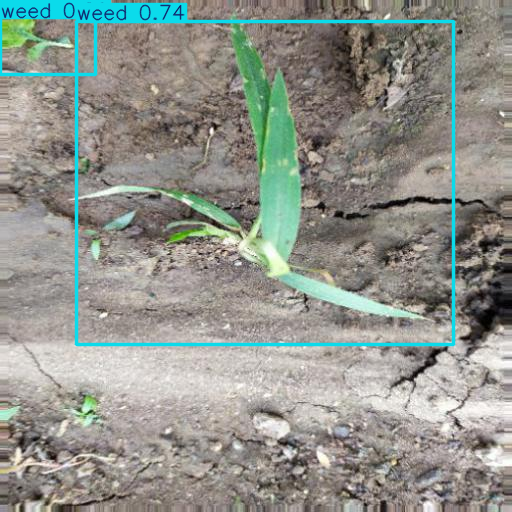

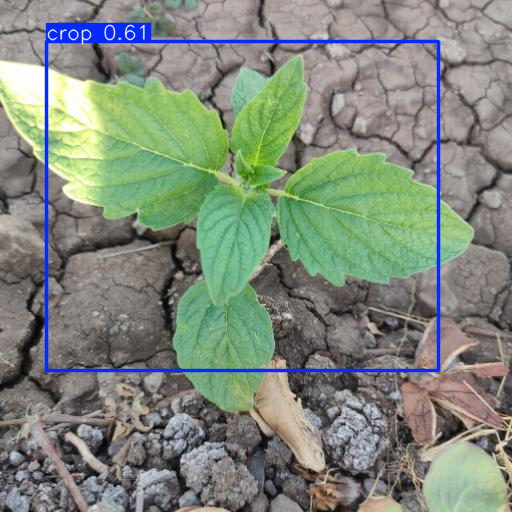

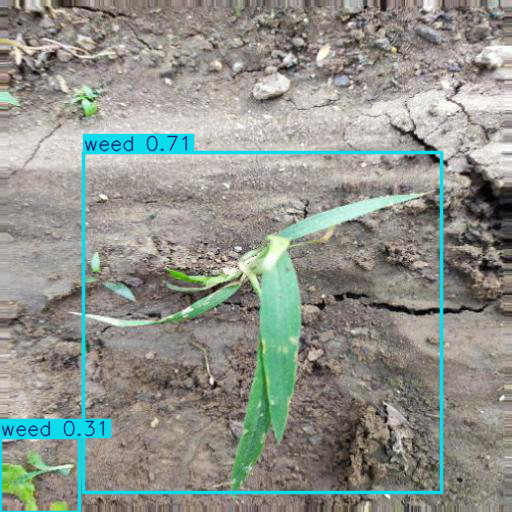

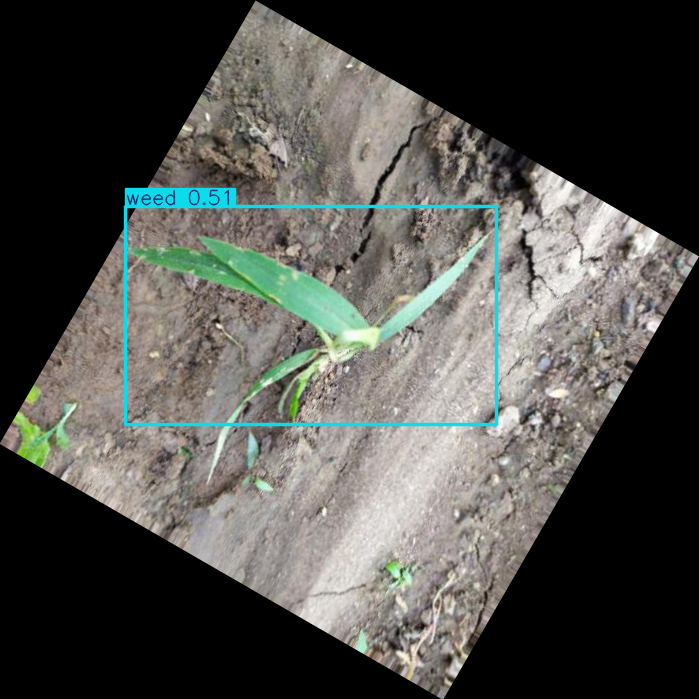

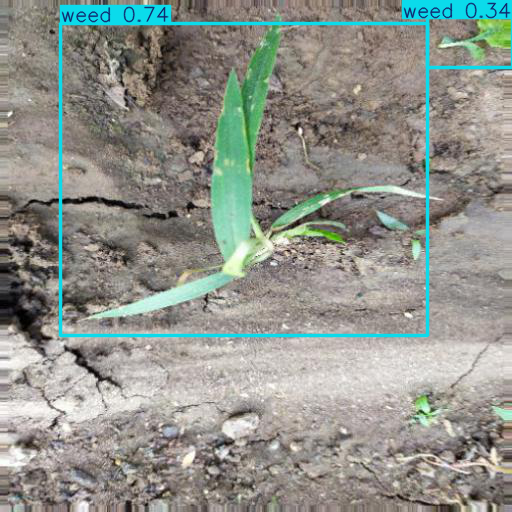

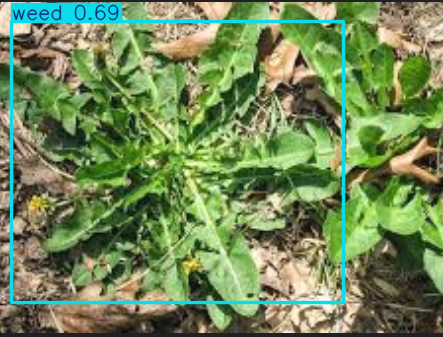

In [11]:
# prediction test
model = YOLO("runs/detect/train3/weights/best.pt")

results = model(["/kaggle/input/weeds-detection/dataset/images/test/agri_0_1020.jpeg","/kaggle/input/weeds-detection/dataset/images/test/agri_0_1214.jpeg","/content/Hflip_screenshot_09.12.2025.png", "/content/rotated_screenshot_09.12.2025.png","/content/Vflip_screenshot_09.12.2025.png","/content/Screenshot 2025-12-09 125933.png"  ])
#results = model(["/kaggle/input/weeds-detection/dataset/images/test/agri_0_1351.jpeg","agri_0_1214.jpeg"])
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk